In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


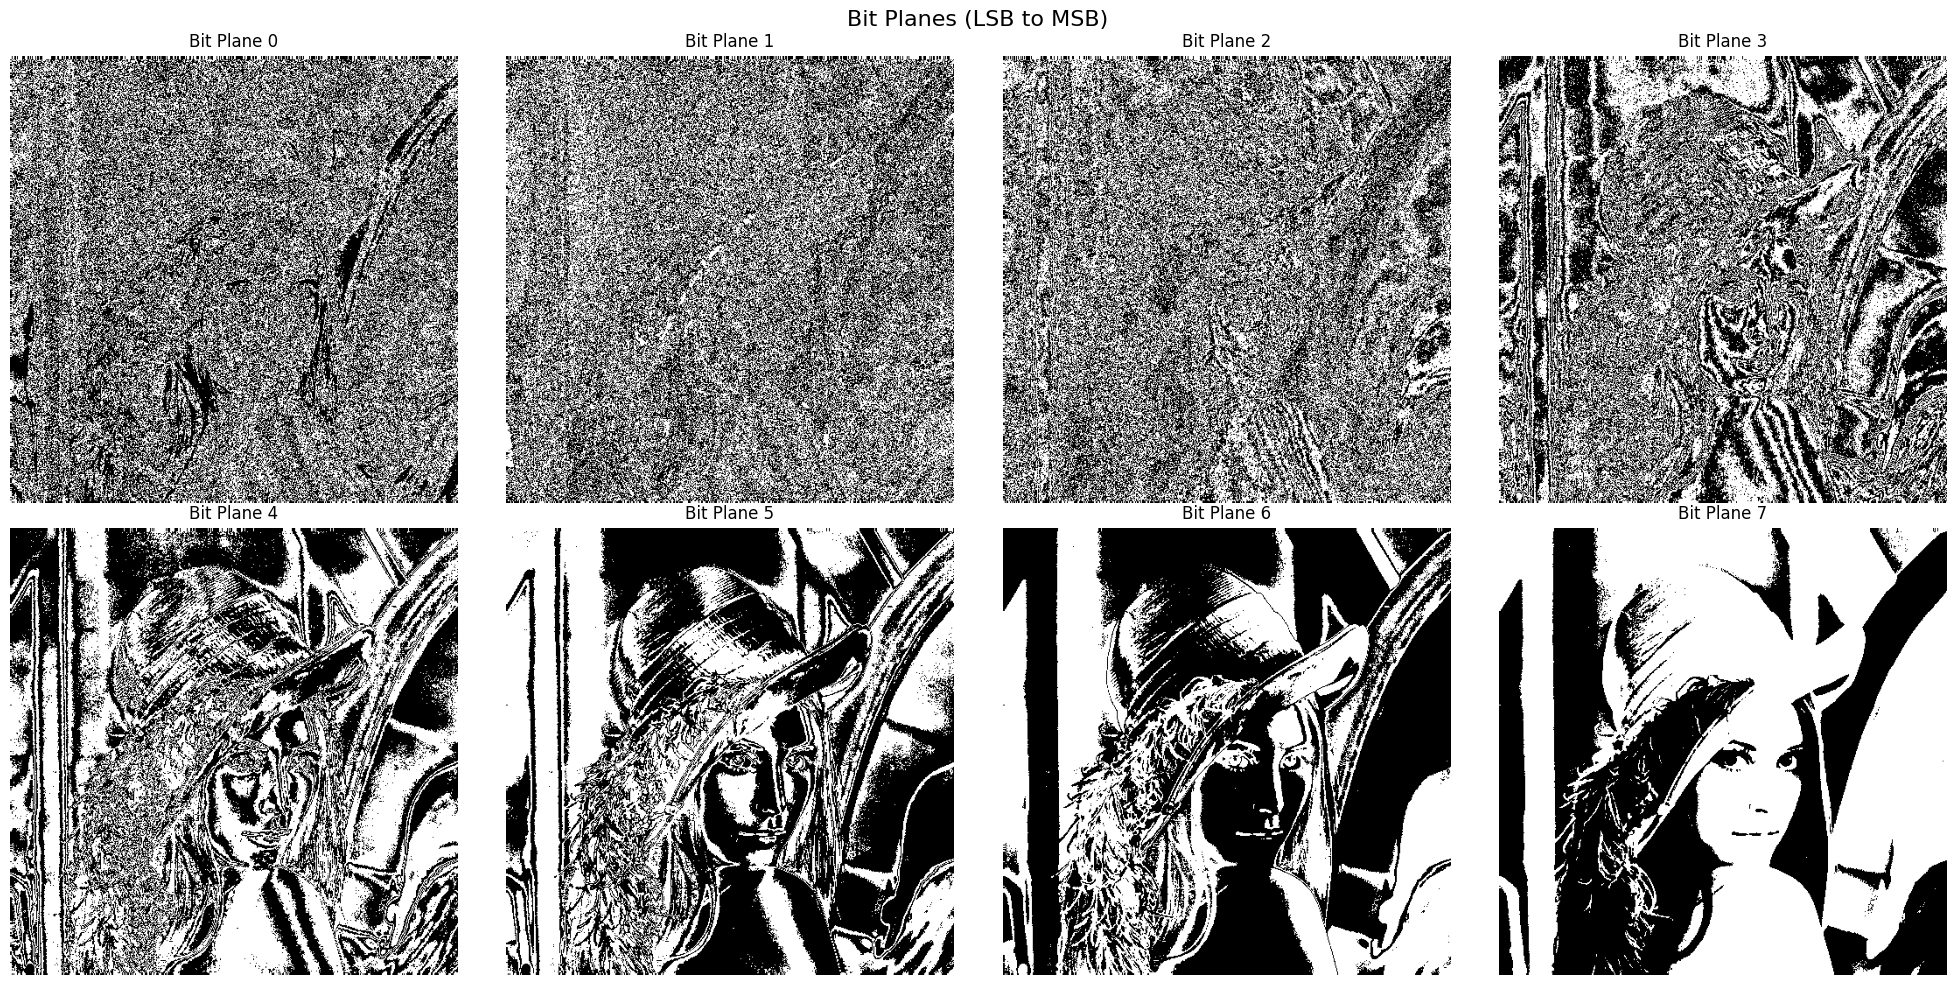

In [2]:

# Read the image
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# Function to extract bit planes
def get_bit_plane(img, bit):
    return ((img >> bit) & 1) * 255

# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Bit Planes (LSB to MSB)', fontsize=16)

# Iterate through bit planes and display
for i in range(8):
    bit_plane = get_bit_plane(img, i)
    row = i // 4
    col = i % 4
    axs[row, col].imshow(bit_plane, cmap='gray')
    axs[row, col].set_title(f'Bit Plane {i}')
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

Writing my name in the lsb plane

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def write_to_lsb(img, text):
    # Convert text to binary
    binary = ''.join(format(ord(char), '08b') for char in text)
    binary += '0' * 8  # Add null terminator

    if len(binary) > img.shape[0] * img.shape[1]:
        raise ValueError("Text is too long to fit in the image")

    # Create a copy of the image
    img_copy = img.copy()

    # Flatten the image
    flat_img = img_copy.flatten()

    # Write the binary data to the LSB
    for i, bit in enumerate(binary):
        flat_img[i] = (flat_img[i] & 0xFE) | int(bit)

    # Reshape the image back to its original shape
    return flat_img.reshape(img.shape)

def read_from_lsb(img):
    # Flatten the image
    flat_img = img.flatten()

    # Read the binary data from the LSB
    binary = ''.join(str(pixel & 1) for pixel in flat_img)

    # Convert binary to text
    text = ''
    for i in range(0, len(binary), 8):
        byte = binary[i:i+8]
        if byte == '00000000':  # Check for null terminator
            break
        text += chr(int(byte, 2))

    return text


Name read from LSB: Drishtant


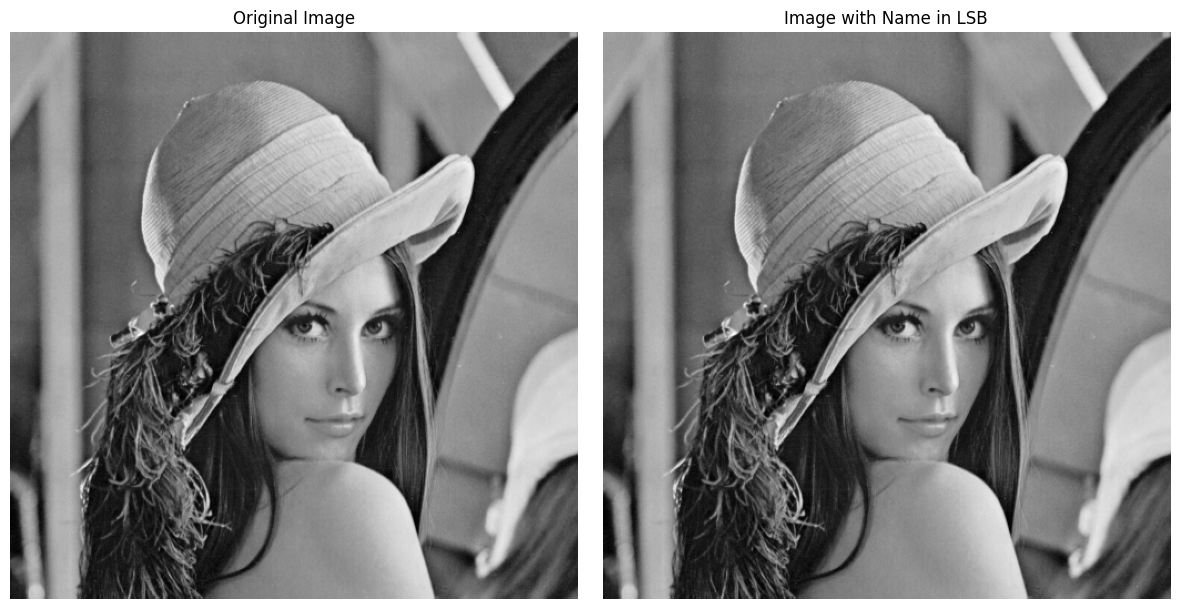

True

In [4]:

# Read the image
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)


name = "Drishtant"
img_with_name = write_to_lsb(img, name)

# Read back the name from the LSB plane
read_name = read_from_lsb(img_with_name)
print(f"Name read from LSB: {read_name}")

# Display original and modified images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(img_with_name, cmap='gray')
ax2.set_title('Image with Name in LSB')
ax2.axis('off')

plt.tight_layout()
plt.show()

# Save the modified image
cv2.imwrite('output_image_with_name.jpg', img_with_name)